The overall purpose of this exercise is to understand how spectral energy distributions of galaxies vary depending on various physical conditions. 
We shall model the galaxies using the python wrapper of FSPS (http://dfm.io/python-fsps/current/ ). 

1.	Read the user guide on the above website on “Modelling Stellar Populations”. Also get familiar with the 3_FSPS_manual.pdf provided with this document (Sections 2.2.1, 2.1.2, 2.2.3). 


In [1]:
%matplotlib inline
import fsps
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

from __future__ import unicode_literals
mp.rcParams['text.usetex']=True
mp.rcParams['text.latex.unicode']=True
mp.rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

First we shall generate a simple SED of a galaxy and plot it. 

In [2]:
sp = fsps.StellarPopulation(zcontinuous=1, sfh=0, logzsol=0.0, dust_type=2, dust2=0.2)

### 1) Investigate from the FSPS manual what is the explicitly stated meaning of the parameters:
    
    - `zcontinuous=1`--> This means that.........
    - `sfh=0`-->
    - `logzsol=0.0`-->
    - `dust_type=2`-->
    - `dust2=0.2` -->

### 2) Now check what parameters are defined as a default:
    
    - what is the IMF parameterization?
    - what are the stellar libraraies and isochrones used?
    - what is the gas phase metallcity?
    - How is the Inter galactic medium (IGM) absorption handled?
    - Is dust emission inluded?
    - Is nebular continuum included?
    - Are nebular emission lines included?


### 3)  Plot the spectrum of the object at the specified times on the same figure (check the user guide on how to extract the spectrum at a given time). Limit the wavelength range to 900, 30000 A and make x,y axis logarithmic if necessary to increase the clarity. Use different colours as specified. Tip: Make the figure using a function, which can be easily used for all the other spectra you'll be generating today.



    - 1 Myr (Navy)
    - 10 Myr (cyan)
    - 1 Gyr (lime green)
    - 10 Gyr (pink)
    - 13 Gyr (red)

   

In [5]:
#### first make a function to make figures
def plot_spectra(all_wavelength, all_flux, all_colours, all_labels, xlim=[900,30000], ylim=None, logx=True, logy=True):
    '''
    Input wavelength and flux as a 2D array, specify a colour and a label  for each spectra 
    '''

    fig = plt.Figure(figsize=(6,4))
    
    for index, spectra in enumerate(all_wavelength):
        plt.plot(all_wavelength[index], all_flux[index], color=all_colours[index], 
                 ls='-', lw=1, label=all_labels[index])
        
    plt.xlim(xlim[0], xlim[1])
    
    if ylim is None:
        ylim=[np.min(all_flux), np.max(all_flux)]
    plt.ylim(ylim[0], ylim[1])
    
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('log')
    
    plt.legend(fontsize='medium', loc='best')

    plt.xlabel('Wavelength (\AA)')
    plt.ylabel(r'Flux (L$_\odot$/\AA)')
    
    
    return fig
    

In [4]:
model_3 = fsps.StellarPopulation(zcontinuous=1, sfh=0, logzsol=0.0, dust_type=2, dust2=0.2)

In [5]:
wave=[]; spec=[]

times=[1e-3,1e-2,1,10,13]
colours=['navy', 'cyan', 'limegreen', 'pink', 'red']
labels=['SSP 1 Myr', 'SSP 10 Myr', 'SSP 1 Gyr', 'SSP 10 Gyr', 'SSP 13 Gyr']

for time in times:

    w, s = model_3.get_spectrum(tage=time, peraa=True)
    wave.append(w)
    spec.append(s)
    

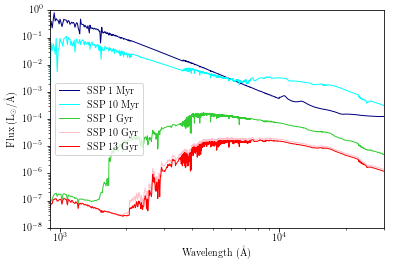

In [6]:
fig = plot_spectra(wave, spec,colours, labels, ylim=[1e-8,1])
plt.savefig('3_FSPS_q3.pdf')

### 4)  Compare the results with your neighbour to see if you both got the same spectrum.

    
   

### 5) Discuss differences between the model of a galaxy you made now with a real galaxy in the Universe. 

It is unlikely for a galaxy in the Universe to be made from a single star-burst. 
Could also discuss simplifications associated in building SSPs, galaxy interactions etc. 

### Now we are ready to move into a more complicated spectrum


### 6) Make a model of a galaxy with a constant SFH, Z=0.01 (use zcontinuous=1), with no dust, no nebular continnum, no nebular emission observed at a redshift of 0. Make a similar plot to 3 using same colours and compare the differences. 



In [7]:
model_6 = fsps.StellarPopulation(zcontinuous=1, sfh=1, const=1.0, 
                                 logzsol= np.log10(0.01/0.02) , 
                                 dust_type=2, dust1=0.0, dust2=0.0, 
                                add_neb_emission=0, add_neb_continuum=0)

In [8]:
wave=[]; spec=[]

times=[1e-3,1e-2,1,10,13]
colours=['navy', 'cyan', 'limegreen', 'pink', 'red']
labels=['SSP 1 Myr', 'SSP 10 Myr', 'SSP 1 Gyr', 'SSP 10 Gyr', 'SSP 13 Gyr']

for time in times:

    w, s = model_6.get_spectrum(tage=time, peraa=True)
    wave.append(w)
    spec.append(s)
    

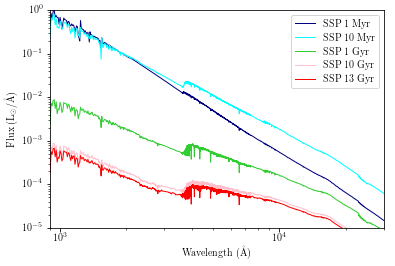

In [9]:
fig = plot_spectra(wave, spec,colours, labels, ylim=[1e-5,1])
plt.savefig('3_FSPS_q6.pdf')

### 7) Use the model made in 6 and add nebular continuum and nebular emission and remake the plot. What differences do you see?



In [2]:
model_7 = fsps.StellarPopulation(zcontinuous=1, sfh=1, const=1.0,
                                 logzsol= np.log10(0.01/0.02) , 
                                 dust_type=2, dust1=0.0, dust2=0.0, 
                                add_neb_emission=1, add_neb_continuum=1)

In [3]:
wave=[]; spec=[]

times=[1e-3,1e-2,1,10,13]
colours=['navy', 'cyan', 'limegreen', 'pink', 'red']
labels=['SSP 1 Myr', 'SSP 10 Myr', 'SSP 1 Gyr', 'SSP 10 Gyr', 'SSP 13 Gyr']

for time in times:

    w, s = model_7.get_spectrum(tage=time, peraa=True)
    wave.append(w)
    spec.append(s)
    

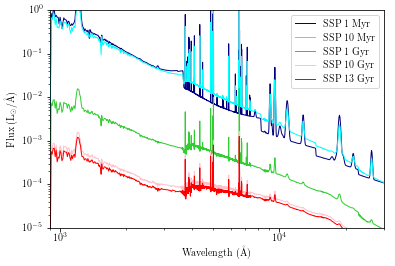

In [8]:
fig = plot_spectra(wave, spec,colours, labels, ylim=[1e-5,1])
plt.savefig('3_FSPS_q7.pdf')

Notice the increase in the continuum level and the addition of nebular emission line.

### 8) Using the model generated in 7, change the metallacity to
    - Z=0.002
    - Z=0.02
### and note the changes in the spectra. 




In [18]:
model_8_1 = fsps.StellarPopulation(zcontinuous=1, sfh=1, const=1.0,
                                 logzsol= np.log10(0.002/0.02) , 
                                 dust_type=2, dust1=0.0, dust2=0.0, 
                                add_neb_emission=1, add_neb_continuum=1)

model_8_2 = fsps.StellarPopulation(zcontinuous=1, sfh=1, const=1.0,
                                 logzsol= np.log10(0.02/0.02) , 
                                 dust_type=2, dust1=0.0, dust2=0.0, 
                                add_neb_emission=1, add_neb_continuum=1)

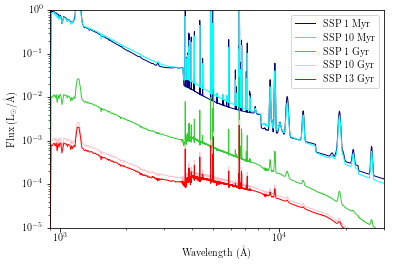

In [22]:
wave=[]; spec=[]

times=[1e-3,1e-2,1,10,13]
colours=['navy', 'cyan', 'limegreen', 'pink', 'red']
labels=['SSP 1 Myr', 'SSP 10 Myr', 'SSP 1 Gyr', 'SSP 10 Gyr', 'SSP 13 Gyr']


for time in times:

    w, s = model_8_1.get_spectrum(tage=time, peraa=True)
    wave.append(w)
    spec.append(s)
    
fig = plot_spectra(wave, spec,colours, labels, ylim=[1e-5,1])
plt.savefig('3_FSPS_q8_Z002.pdf')

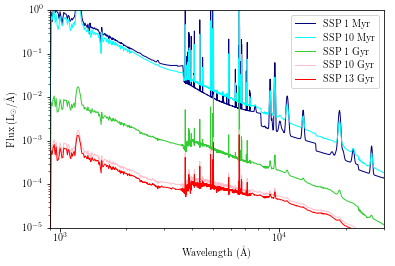

In [23]:
wave=[]; spec=[]

times=[1e-3,1e-2,1,10,13]
colours=['navy', 'cyan', 'limegreen', 'pink', 'red']
labels=['SSP 1 Myr', 'SSP 10 Myr', 'SSP 1 Gyr', 'SSP 10 Gyr', 'SSP 13 Gyr']

for time in times:

    w, s = model_8_2.get_spectrum(tage=time, peraa=True)
    wave.append(w)
    spec.append(s)
    
fig = plot_spectra(wave, spec,colours, labels, ylim=[1e-5,1])
plt.savefig('3_FSPS_q8_Z02.pdf')

Notice the change in the emission line strength between the two metallicity models. What do you think gives rise to this change?
Think interms of cooling, hardness of radiation field, and abundances. What do you think is important?

### 9) Using the model from 7 (Z=0.02) add the following amount of dust attenuation following the Calzetti  attenuation curve and make a figure to compare the spectra at t=20 Myr. Increase the wavelength coverage to 100,000 A. 
    - Av=0
    - Av =0.5
    - Av = 1.0
    - Av = 3.0

### What do you notice when the dust attenuation is added?



In [11]:
wave=[]; spec=[]


Avs=[0,0.5,1.0,3.0]
colours=['navy', 'cyan', 'limegreen', 'pink', 'red']
labels=['Av=0', 'Av=0.5', 'Av=1.0', 'Av=3.0']


for Av in Avs:
    
    model_9 =  fsps.StellarPopulation(zcontinuous=1, sfh=1, const=1.0,
                                 logzsol= np.log10(0.01/0.02) , 
                                 dust_type=2, dust1=0.0, dust2=Av,
                                add_neb_emission=1, add_neb_continuum=1)


    w, s = model_9.get_spectrum(tage=20e-3, peraa=False)
    wave.append(w)
    spec.append(s)
    

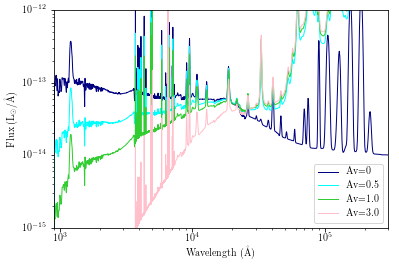

In [12]:
fig = plot_spectra(wave, spec,colours, labels, ylim=[1e-15, 1e-12], xlim=[900, 300000])
plt.savefig('3_FSPS_q9.pdf')

Notice how the UV gets fainter with increasing dust and the change in the FIR. Zoom into the FIR part of the dust models to see how adding different levels of attenuation changes the spectrum. 
Investigate the dust_mass parameter in the models. You can also check out the Draine and Li model parameters.  

### 10) Now we shall combine all of these effects. Make on 1 figure the following:
    - Model in 7 at 100 Myr with Z=0.002 observed at z=10
    - Model in 7 at 500 Myr with Z=0.002 with Av=0.5 observed at z=5
    - Model in 7 at 2 Gyr with Z=0.02 with Av=1.0 observed at z=2
    - Model in 3 at 13 Gyr observed at z=0
    
This is left for you as an exercise. Don't forget to consider the effect of redshift which shifts the spectra to redder regions and also the dimming of the spectrum from luminosity distance.     
    
### What connections could you make to `real` galaxies?



    

### When you have time play around with the code more and investiagte effects on the spectra from different parameters as defined in the FSPS manual. 